# 1. Load everything required

In [2]:
import numpy as np
import pandas as pd
from pycoingecko import CoinGeckoAPI
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
from pathlib import Path
import inquirer
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

import requests
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
style.use('ggplot')

C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\blessed\terminal.py:188: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


# 2. Data Gathering
### Setting the dates, getting the crpto index values, creating the portfolio data, testing data returned

In [48]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 4, 8) 
# USING PRICES BELOW TO PULL DATA INTO FOR EACH CRYPTO INDIVIDUALLY
#this will be aggregate portfolio


#crypto_select = input

btc_p = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']
eth_p = web.DataReader('ETH-USD', 'yahoo', start, end) ['Close']
ltc_p = web.DataReader('LTC-USD', 'yahoo', start, end) ['Close']
link_p = web.DataReader('LINK-USD', 'yahoo', start, end) ['Close']
xrp_p = web.DataReader('XRP-USD', 'yahoo', start, end) ['Close']
trx_p = web.DataReader('TRX-USD', 'yahoo', start, end) ['Close']
#WILL CREATE 'PRICES' BELOW TO AGGREGATE VALUES OF THE PRICE VARIBLES
#prices = []
#prices = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']

#1. choose+crypto will be to ONLY take 1 crypto AND get current price
#2. apply results of sim aggregate "AVG Daily Pct.Change" * that price
#Choose_crypto = input()

prices = ((btc_p.pct_change()+eth_p.pct_change()+ltc_p.pct_change()+link_p.pct_change()+xrp_p.pct_change()+trx_p.pct_change())/6).round(4)
#prices = abs(price2/6
#prices = xrp_p
returns = prices.pct_change()
prices

Date
2020-01-01       NaN
2020-01-02   -0.0328
2020-01-03    0.0470
2020-01-04    0.0108
2020-01-05    0.0017
               ...  
2021-04-04    0.1037
2021-04-05    0.0400
2021-04-06   -0.0939
2021-04-07    0.0747
2021-04-08   -0.0257
Name: Close, Length: 461, dtype: float64

# 3. Getting the New Cryptos in to Play

In [50]:
#testing values for getting additional cryptos from Yahoo finance
coti_p = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
ewt_p = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
kda_p = web.DataReader('KDA-USD', 'yahoo', start, end) ['Close']

#cryto_choice = 
coti_p.pct_change().round(4)


Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

In [51]:
#get user input to create new_crypto variable
choice = input("Enter COTI, EWT or KDA: ")

if choice == 'COTI' :
    print("You chose COTI to project future performance") 
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT' :
    print("You chose Energy Web to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA' :
    print("You chose Kadena to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid choice")

Enter COTI, EWT or KDA:  EWT


You chose Energy Web to project future performance


In [52]:
#assign value for new new_crypto_choice variable
if choice == 'COTI':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT':
    new_crypto_choice = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid crypto choice provided")


In [53]:
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns

Date
2020-03-29       NaN
2020-03-30   -0.2616
2020-03-31    0.2877
2020-04-01   -0.4562
2020-04-02    0.1484
               ...  
2021-04-04    0.0567
2021-04-05    0.0757
2021-04-06   -0.0470
2021-04-07    0.0580
2021-04-08   -0.0440
Name: Close, Length: 348, dtype: float64

In [55]:
last_price = prices[-2]
last_price

0.0747

In [54]:
last_price = prices[-1]
last_price

-0.0257

# 4. Headed to Monte Carlo

In [56]:
#number of sims
number_simulations = 1000
number_days = 463

In [57]:
#set df for simulation
simulation_df = pd.DataFrame()

In [58]:
#set values for monte carlo simulation

for x in range (number_simulations):
    count = 0
    daily_volatility = prices.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(number_days):
        if count == 462:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series        

In [59]:
simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.075970,0.069885,0.076060,0.073919,0.071778,0.075626,0.072358,0.074641,0.075063,0.077326,...,0.073676,0.076173,0.070001,0.080917,0.069976,0.074863,0.065482,0.072418,0.063658,0.077540
1,0.072901,0.069680,0.077989,0.072458,0.074465,0.078421,0.071270,0.073140,0.077188,0.077757,...,0.076047,0.072605,0.073612,0.084198,0.066836,0.078481,0.064129,0.072163,0.068283,0.085121
2,0.075602,0.069084,0.081876,0.078077,0.075800,0.077802,0.071215,0.077110,0.075473,0.073049,...,0.079680,0.072510,0.075700,0.080751,0.069326,0.083356,0.061206,0.073000,0.065305,0.081179
3,0.078825,0.070853,0.083201,0.076062,0.076215,0.075528,0.072498,0.077911,0.074777,0.071151,...,0.080872,0.075469,0.080168,0.077387,0.069276,0.080050,0.061647,0.075551,0.063970,0.079729
4,0.071894,0.074652,0.081950,0.069720,0.077981,0.077078,0.071176,0.075655,0.077090,0.076408,...,0.084420,0.074059,0.077109,0.076897,0.069090,0.078044,0.063214,0.081730,0.066599,0.079518


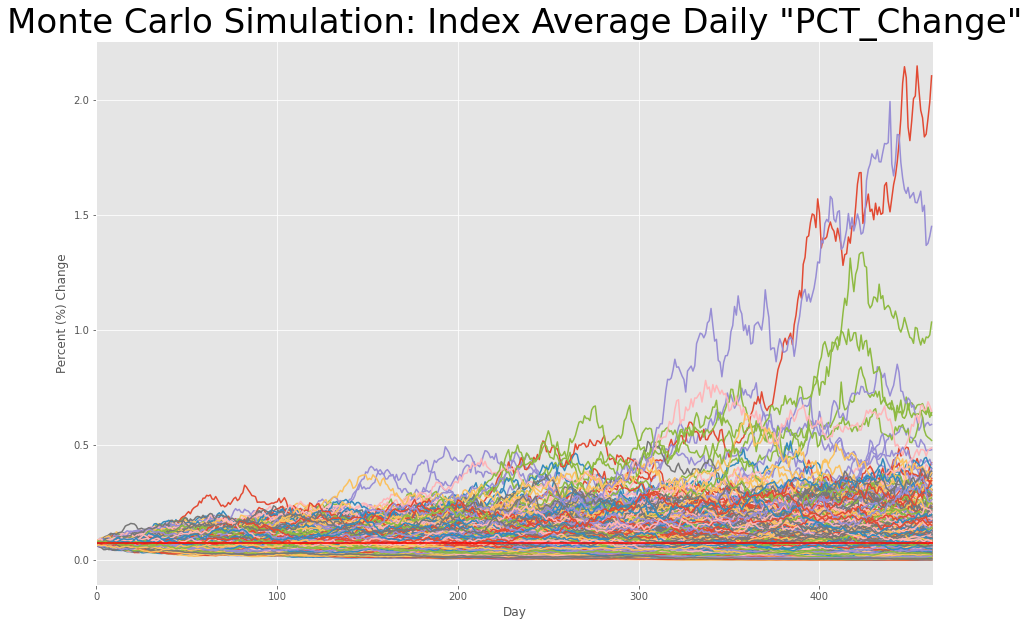

In [61]:
#Plot the Monte Carlo sim. and show
fig = plt.figure(figsize=(15,10))
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Monte Carlo Simulation: Index Average Daily "PCT_Change"', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Percent (%) Change')
#plt.ylim(1500, )
plt.show()

In [62]:
#Getting Average EOY values
annual_values = (simulation_df).iloc[462].sort_values(ascending = False).round(4)
annual_values

154    2.1042
758    1.4503
61     1.0349
531    0.6484
138    0.6418
        ...  
188    0.0036
229    0.0036
267    0.0035
606    0.0030
896    0.0028
Name: 462, Length: 1000, dtype: float64

In [74]:
#Get the Index values range; mean, median, max, min
#mean_round = round(annual_values.mean,2)
#print(f'The Crypto Index Average Price %Change the Next 365 Days is {100*(mean_round())}%')

print(f'The Crypto Index Average Price % Change the Next 365 Days is {100*(annual_values.mean())} %')
print(f'The Crypto Index Median Price % Change the Next 365 Days is {100*(annual_values.median())} %')
print(f'The Crypto Index MAXIMUM Price % Change the Next 365 Days is {100*(annual_values.max())} %')
print(f'The Crypto Index LOWEST Price % Change the Next 365 Days is {100*(annual_values.min())} %')

The Crypto Index Average Price % Change the Next 365 Days is 7.58510999999999 %
The Crypto Index Median Price % Change the Next 365 Days is 4.535 %
The Crypto Index MAXIMUM Price % Change the Next 365 Days is 210.42000000000002 %
The Crypto Index LOWEST Price % Change the Next 365 Days is 0.27999999999999997 %


Text(0, 0.5, 'Deviation')

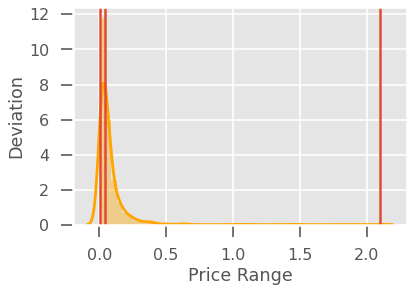

In [79]:
#Chart it all
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.distplot(annual_values, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 2.5})
plt.axvline(x=annual_values.median())
plt.axvline(x=annual_values.max())
plt.axvline(x=annual_values.min())

plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')


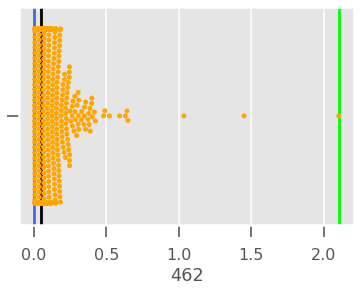

In [80]:
#Chart it all
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.swarmplot(annual_values, color='orange')

plt.axvline(x=annual_values.median(), color='black')
plt.axvline(x=annual_values.max(), color='lime')
plt.axvline(x=annual_values.min(), color='royalblue')



# NEW Simulation for New Crpto Values

In [82]:
#Make sure the required variables for the new crypto are avauilable
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns
last_crpyto_price = new_crypto_choice[-1]

In [83]:
#Variable for new sim df
new_simulation_df = pd.DataFrame()

In [84]:
#Sim for the new crypto data
for x in range (number_simulations):
    count = 0
    daily_volatility_2 = prices.std()
    
    price_series_new = []
    
    price_new = last_crpyto_price * (1 + np.random.normal(0, daily_volatility_2))
    price_series_new.append(price)
    
    for y in range(number_days):
        if count == 462:
            break
        price_new = price_series_new[count] * (1 + np.random.normal(0, daily_volatility_2))
        price_series_new.append(price_new)
        count += 1
    
    new_simulation_df[x] = price_series_new        

In [85]:
new_simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,...,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684,0.026684
1,0.027413,0.027389,0.026773,0.027711,0.027515,0.025382,0.028310,0.026505,0.028160,0.026506,...,0.026067,0.026992,0.027646,0.025894,0.029411,0.026148,0.027602,0.027414,0.027387,0.025310
2,0.027520,0.028477,0.025749,0.027971,0.027428,0.023924,0.029067,0.026454,0.030373,0.025179,...,0.027499,0.027595,0.027730,0.027657,0.029717,0.025632,0.027085,0.027407,0.029193,0.025601
3,0.027392,0.026129,0.022683,0.028618,0.026646,0.024004,0.028229,0.027405,0.029150,0.026204,...,0.030289,0.029108,0.027808,0.030050,0.030226,0.025186,0.026234,0.025937,0.029374,0.026973
4,0.028763,0.025952,0.022113,0.029677,0.024040,0.024260,0.027256,0.027397,0.028186,0.026251,...,0.027738,0.029938,0.027667,0.030088,0.027725,0.023134,0.026565,0.025529,0.026565,0.025595


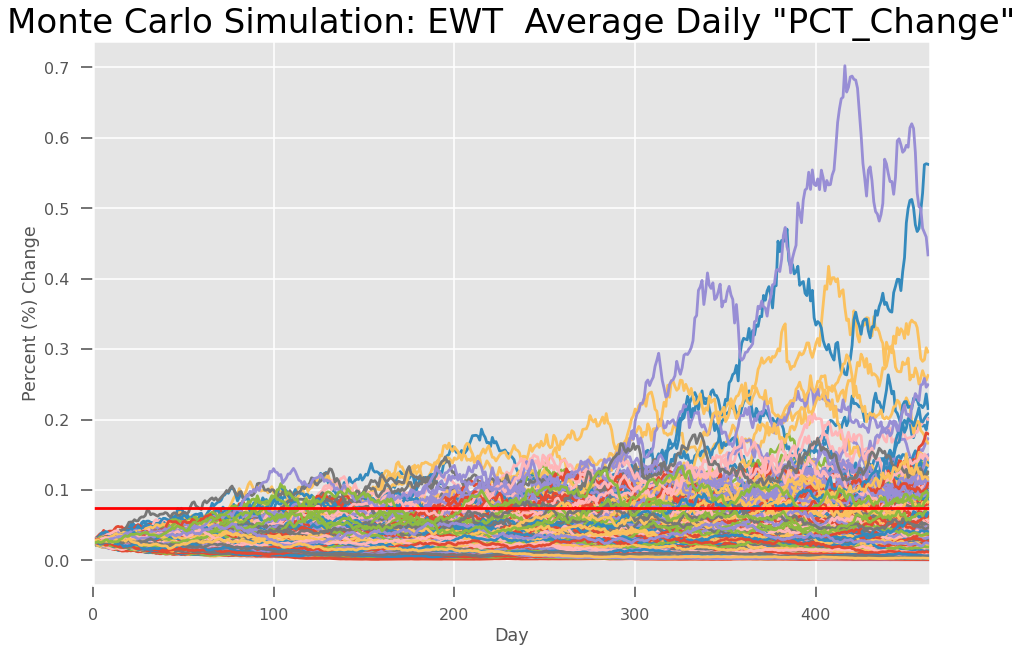

In [88]:
#Plot the Monte Carlo sim. and show for new crpyto
fig = plt.figure(figsize=(15,10))
plt.plot(new_simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Monte Carlo Simulation: '+ choice + '  Average Daily "PCT_Change"', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Percent (%) Change')
#plt.ylim(1500, )
plt.show()

In [89]:
#Getting Average EOY values for New Crypto
annual_values_c = (new_simulation_df).iloc[462].sort_values(ascending = False).round(4)
annual_values_c

358    0.5625
940    0.4339
39     0.2960
319    0.2626
765    0.2494
        ...  
93     0.0013
471    0.0013
966    0.0013
912    0.0010
790    0.0009
Name: 462, Length: 1000, dtype: float64

In [95]:
#show the new crypto values range; mean, median, max, min

print(f'The NEW Crypto Average Price % Change the Next 365 Days is +/- {100*(annual_values_c.mean())} %')
print(f'The NEW Crypto Median Price % Change the Next 365 Days is +/- {100*(annual_values_c.median())} %')
print(f'The NEW Crypto MAXIMUM Price % Change the Next 365 Days is +/- {100*(annual_values_c.max())} %')
print(f'The NEW Crypto LOWEST Price % Change the Next 365 Days is +/- {100*(annual_values_c.min())} %')

The NEW Crypto Average Price % Change the Next 365 Days is +/- 2.778999999999999 %
The NEW Crypto Median Price % Change the Next 365 Days is +/- 1.6500000000000001 %
The NEW Crypto MAXIMUM Price % Change the Next 365 Days is +/- 56.25 %
The NEW Crypto LOWEST Price % Change the Next 365 Days is +/- 0.09 %
